In [48]:
import numpy as np
import pandas as pd
import seaborn as sb
import sklearn
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

# Read the data into a DataFrame
df =pd.read_csv("https://raw.githubusercontent.com/hxt200010/CS4375HW1/main/student-por.csv")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
# List of binary column names
binary_columns = ['schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher','internet','romantic']

# Apply label encoding to each binary column
for column in binary_columns:
    df[column] = df[column].map({'yes': 1, 'no': 0})


In [51]:
df.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,6,9,11,11
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13


In [52]:
#Pulling correlations to see if y are correlstions within the dataframe
df.corr()

<ipython-input-52-c58f5b118849>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,0.034490,-0.008415,0.319968,-0.167841,-0.101894,-0.005458,-0.054279,...,-0.020559,-0.004910,0.112805,0.134768,0.086357,-0.008750,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,0.097006,-0.172210,-0.022168,0.120491,0.113973,0.119354,...,0.024421,-0.019686,0.009536,-0.007018,-0.019766,0.004614,-0.008577,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,0.050400,-0.165915,0.023572,0.135191,0.094628,0.079700,...,0.020256,0.006841,0.027690,0.000061,0.038445,0.044910,0.029859,0.217501,0.225139,0.211800
traveltime,0.034490,-0.265079,-0.208288,1.000000,-0.063154,0.097730,-0.044807,-0.039289,-0.044842,-0.033376,...,-0.009521,0.000937,0.057454,0.092824,0.057007,-0.048261,-0.008149,-0.154120,-0.154489,-0.127173
studytime,-0.008415,0.097006,0.050400,-0.063154,1.000000,-0.147441,0.089316,0.143509,-0.002314,0.070080,...,-0.004127,-0.068829,-0.075442,-0.137585,-0.214925,-0.056433,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,0.097730,-0.147441,1.000000,-0.000745,-0.006982,0.069416,0.000561,...,-0.062645,0.108995,0.045078,0.105949,0.082266,0.035588,0.122779,-0.384210,-0.385782,-0.393316
schoolsup,-0.167841,-0.022168,0.023572,-0.044807,0.089316,-0.000745,1.000000,0.075402,0.040512,-0.030246,...,-0.012038,-0.015611,-0.058124,-0.028076,-0.098275,0.022760,-0.059503,-0.071779,-0.056624,-0.066405
famsup,-0.101894,0.120491,0.135191,-0.039289,0.143509,-0.006982,0.075402,1.000000,0.094297,-0.007433,...,0.015228,0.003764,0.017262,-0.016844,-0.065605,0.018803,0.041980,0.038255,0.038141,0.059206
paid,-0.005458,0.113973,0.094628,-0.044842,-0.002314,0.069416,0.040512,0.094297,1.000000,0.065781,...,0.031937,-0.049574,-0.006683,0.051986,0.035682,0.063203,-0.035959,-0.062784,-0.033925,-0.054898
activities,-0.054279,0.119354,0.079700,-0.033376,0.070080,0.000561,-0.030246,-0.007433,0.065781,1.000000,...,0.057597,0.150329,0.088582,0.022592,0.032824,0.013001,-0.015115,0.080123,0.067154,0.059791


In [53]:
#After the correlation, the outcome G3: final grade has strong correlation with G1& G2
X = df[['G1', 'G2']]  # Use only G1 and G2 as features
y = df['G3']

X

,G1,G2
0,0,11
1,9,11
2,12,13
3,14,14
4,11,13
...,...,...
644,10,11
645,15,15
646,11,12
647,10,10


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
print(y_test.isnull().sum())  # If y_test is a pandas Series or DataFrame
# OR
print(np.isnan(y_test).sum())  # If y_test is a numpy array


0
0


In [56]:
import random
def initialize(dim):
  b=random.random()
  theta=np.random.rand(dim)
  return b,theta

b,theta=initialize(2)
print("Bias: ",b,"Weights: ",theta)

Bias:  0.012928377945316871 Weights:  [0.76326454 0.79985188]


In [57]:

def predict_Y(b,theta,X):
  return b + np.dot(X,theta)
Y_hat=predict_Y(b,theta,X_train)
Y_hat[0:10]

array([28.14902399, 17.97047357, 16.44394449, 18.77032545, 16.44394449,
       16.40735715, 13.39088634, 13.31771165,  5.35578015, 19.53358999])

In [58]:
import math
def get_cost(Y,Y_hat):
  Y_resd=Y-Y_hat
  return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)
Y_hat=predict_Y(b,theta,X_train)
get_cost(y_train,Y_hat)


39.08653794939137

In [59]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
  db=(np.sum(y_hat-y)*2)/len(y)
  dw=(np.dot((y_hat-y),x)*2)/len(y)
  b_1=b_0-learning_rate*db
  theta_1=theta_o-learning_rate*dw
  return b_1,theta_1
print("After initialization -Bias: ",b,"theta: ",theta)
Y_hat=predict_Y(b,theta,X_train)
b,theta=update_theta(X_train,y_train,Y_hat,b,theta,0.01)
print("After first update -Bias: ",b,"theta: ",theta)
get_cost(y_train,Y_hat)


After initialization -Bias:  0.012928377945316871 theta:  [0.76326454 0.79985188]
After first update -Bias:  -0.10646920822737585 theta:  [-0.6511798  -0.63009232]


39.08653794939137

In [60]:
import pandas as pd

def run_gradient_descent(X, Y, alpha, num_iterations):
    b, theta = initialize(X.shape[1])
    iter_num = 0
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])
    result_idx = 0

    for each_iter in range(num_iterations):
        Y_hat = predict_Y(b, theta, X)
        this_cost = get_cost(Y, Y_hat)
        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X, Y, Y_hat, prev_b, prev_theta, alpha)

        if iter_num % 10 == 0:
            gd_iterations_df.loc[result_idx] = [iter_num, this_cost]
            result_idx = result_idx + 1

        iter_num += 1

    print("Final Estimate of b and theta:", b, theta)

    return gd_iterations_df, b, theta

# Call the function with your data and parameters
gd_iterations_df, b, theta = run_gradient_descent(X_train, y_train, alpha=0.001, num_iterations=200)

# Display the first 10 rows of gd_iterations_df
print(gd_iterations_df.head(10))


Final Estimate of b and theta: -0.0017929720795400532 [0.62784932 0.41650822]
   iteration      cost
0        0.0  6.882343
1       10.0  2.814126
2       20.0  2.762297
3       30.0  2.712790
4       40.0  2.665501
5       50.0  2.620330
6       60.0  2.577181
7       70.0  2.535966
8       80.0  2.496596
9       90.0  2.458990


Text(0, 0.5, 'Cost or MSE')

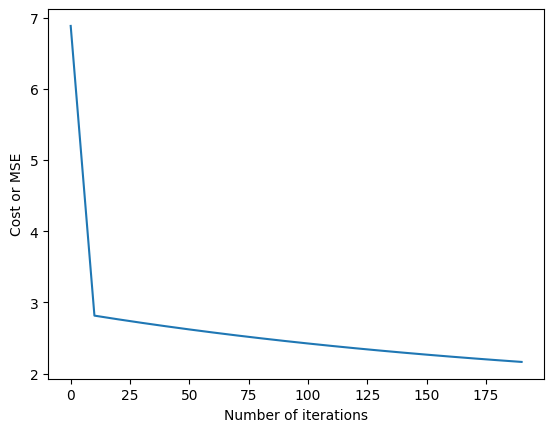

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")


In [62]:
def predict_linear_regression(b, theta, X):
    return b + np.dot(X, theta)

# Predict the test set
y_predicted = predict_linear_regression(b, theta, X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.8902576124319317
Mean Squared Error: 1.9090424421068397
R-squared: 0.8042352292929444


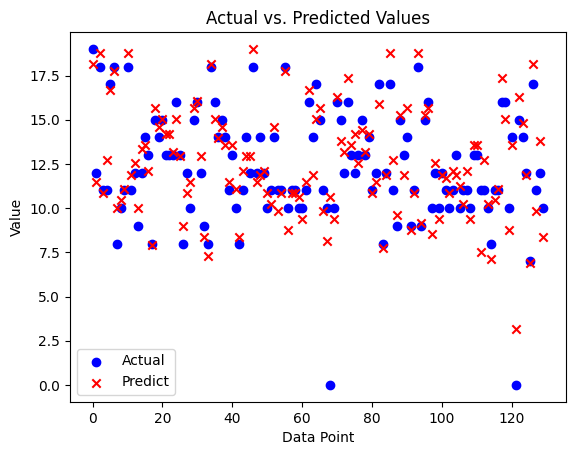

In [63]:
import matplotlib.pyplot as plt

# Create a scatter plot for the actual values (test set)
plt.scatter(range(len(y_test)), y_test, label='Actual', color='blue', marker='o')

# Create a line plot for the predicted values
#plt.plot(range(len(y_test)), y_predicted, label='Predicted', color='red', linestyle='--')
plt.scatter(range(len(y_test)), y_predicted, label='Predict', color='red', marker='x')

plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()